<a href="https://colab.research.google.com/github/W00GY00/DAP2022_2/blob/main/lecture8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os, random

# Startup Data
In this lab, we would like to do multiple linear regression analysis with start-up dataset.

In [2]:
dataPath = 'https://raw.githubusercontent.com/krishnaik06/Multiple-Linear-Regression/master/'
df = pd.read_csv(dataPath + '50_Startups.csv')

df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


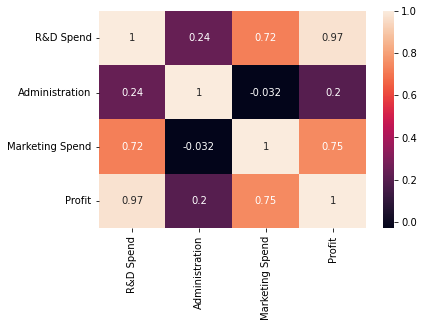

In [3]:
sns.heatmap(df.drop(columns='State').corr() , annot=True)

# Independent and Dependent variables
There are total 5 features in the dataset.

**[TODO]** Split the data that `Profit` is our dependent feature, and the rest of them are our independent features:

In [4]:
# separate the independent attributes from the predicting attribute
X = df.drop('Profit',axis=1)

# separte the dependent attribute into Y for model training 
y = df['Profit']

# Handling categorical variables
**[TODO]** In our dataset, there is one categorical column `State`, convert this categorical values present inside this column for that we will use pandas `get_dummies()` function:


In [5]:
# handle categorical variable
X = pd.get_dummies(X)

X.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


# Splitting Data
**[TODO]** Split the data into training (80%) and testing (20%) parts for that we use the scikit-learn `train_test_split()` function. Set `random_state` as `42`.

In [6]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42)

# Training model
**[TODO]** Apply the linear regression model to our training data, first of all, we have to import linear regression from the scikit-learn library.

In [7]:
# importing module
from sklearn.linear_model import LinearRegression

# creating an object of LinearRegression class
LR = LinearRegression()

# fitting the training data
LR.fit(X_train, y_train)

LinearRegression()

In [8]:
X_test

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
13,91992.39,135495.07,252664.93,1,0,0
39,38558.51,82982.09,174999.30,1,0,0
30,61994.48,115641.28,91131.24,0,1,0
45,1000.23,124153.04,1903.93,0,0,1
17,94657.16,145077.58,282574.31,0,0,1
48,542.05,51743.15,0.00,0,0,1
26,75328.87,144135.98,134050.07,0,1,0
25,64664.71,139553.16,137962.62,1,0,0
32,63408.86,129219.61,46085.25,1,0,0
19,86419.70,153514.11,0.00,0,0,1


In [9]:
y_prediction = LR.predict(X_test)
y_prediction

array([126362.87908255,  84608.45383633,  99677.49425146,  46357.46068582,
       128750.48288505,  50912.41741878, 109741.35032702, 100643.24281647,
        97599.27574593, 113097.42524431])

# Evalutation
Compare the `y_prediction` values with the original values using `r2_score` and `RMSE`.

In [10]:
# importing metrics module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
score=r2_score(y_test,y_prediction)

print('r2 socre is %.4f'%score)
print('root_mean_squared error of is %.2f'%np.sqrt(mean_squared_error(
    y_test, y_prediction)))

r2 socre is 0.8987
root_mean_squared error of is 9055.96


# [Todo!] Regression 실습

자동차의 스펙에 기반해서 책정가격을 regression 기법을 통해 예상해보도록 하죠!

In [11]:
df_price = pd.read_csv('https://raw.githubusercontent.com/TA-YSH/DAP/main/lab8/CarPrice_Assignment.csv', index_col='car_ID').drop(columns =['CarName'])

In [12]:
df_price

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


# 1. Data 전처리
Data를 원하는 방법으로 전처리하세요.
(ex. Imputation, Scaling)

그리고 독립변수 X와 종속변수 y를 나누어주세요.

**[팁]**

1. 데이터 전처리는 모델의 성능에 직접적으로 개입할 수 있는 몇 안되는 수단이에요.
2. 당장 regression에서는 유의미한 차이를 보기 힘들지도 몰라요, 하지만 나중에 더 어려운 데이터를 만났을 때는 큰 차이를 보이기도 한답니다.
3. 여러분의 선택으로 정해진 모델의 성능은 여러분의 점수에 영향을 미칠 예정이에요, 신중하게 선택해주세요.

**[고려할 수 있는 수단]**
1. Encoding은 필수겠네요? 어떤 encoding 방법을 선택할 지는 여러분께 달렸어요!
2. Scaler을 사용할지 안할지 또한 여러분의 선택이에요, 만약 사용해야한다면 어떤 Scaler을 사용할지 또한 고려하셔야겠네요?

In [13]:
toencode = df_price.select_dtypes(exclude="number").columns.tolist()
for c in toencode:
  print(c, ' >> ', df_price[c].unique())

fueltype  >>  ['gas' 'diesel']
aspiration  >>  ['std' 'turbo']
doornumber  >>  ['two' 'four']
carbody  >>  ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel  >>  ['rwd' 'fwd' '4wd']
enginelocation  >>  ['front' 'rear']
enginetype  >>  ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber  >>  ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem  >>  ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [14]:
## 원하는 방법으로 데이터를 전처리하세요 ##
from sklearn.preprocessing import OrdinalEncoder
# doornumber, cylindernumber 제외
enc = OrdinalEncoder(categories=[['gas', 'diesel'], ['std', 'turbo'],
                                 ['convertible', 'hatchback', 'sedan', 'wagon','hardtop'],
                                 ['rwd', 'fwd','4wd'], ['front', 'rear'], ['dohc', 'ohcv', 'ohc', 'l','rotor', 'ohcf', 'dohcv'],
                                 ['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi']])
df_price[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem']] = enc.fit_transform(
    df_price[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem']])
# doornumber, cylindernumber 숫자로 변환
dndic = { 'two': 2, 'four': 4 }
cndic = { 'four': 4, 'six': 6, 'five': 5, 'three': 3, 'twelve':12, 'eight': 8 }
df_price['doornumber'] = df_price.doornumber.map(dndic)
df_price['cylindernumber'] = df_price.cylindernumber.map(cndic)
df_price

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,0.0,0.0,2,0.0,0.0,0.0,88.6,168.8,64.1,...,130,0.0,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,0.0,0.0,2,0.0,0.0,0.0,88.6,168.8,64.1,...,130,0.0,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,0.0,0.0,2,1.0,0.0,0.0,94.5,171.2,65.5,...,152,0.0,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,0.0,0.0,4,2.0,1.0,0.0,99.8,176.6,66.2,...,109,0.0,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,0.0,0.0,4,2.0,2.0,0.0,99.4,176.6,66.4,...,136,0.0,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,0.0,0.0,4,2.0,0.0,0.0,109.1,188.8,68.9,...,141,0.0,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,0.0,1.0,4,2.0,0.0,0.0,109.1,188.8,68.8,...,141,0.0,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,0.0,0.0,4,2.0,0.0,0.0,109.1,188.8,68.9,...,173,0.0,3.58,2.87,8.8,134,5500,18,23,21485.0


In [15]:
# missing data imputation
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3, weights='uniform')
df_price = pd.DataFrame(imputer.fit_transform(df_price),
                        columns = df_price.columns)
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    float64
 1   fueltype          205 non-null    float64
 2   aspiration        205 non-null    float64
 3   doornumber        205 non-null    float64
 4   carbody           205 non-null    float64
 5   drivewheel        205 non-null    float64
 6   enginelocation    205 non-null    float64
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    float64
 12  enginetype        205 non-null    float64
 13  cylindernumber    205 non-null    float64
 14  enginesize        205 non-null    float64
 15  fuelsystem        205 non-null    float64
 16  boreratio         205 non-null    float64
 1

In [16]:
######### no scaling version ###########
df_psc = df_price

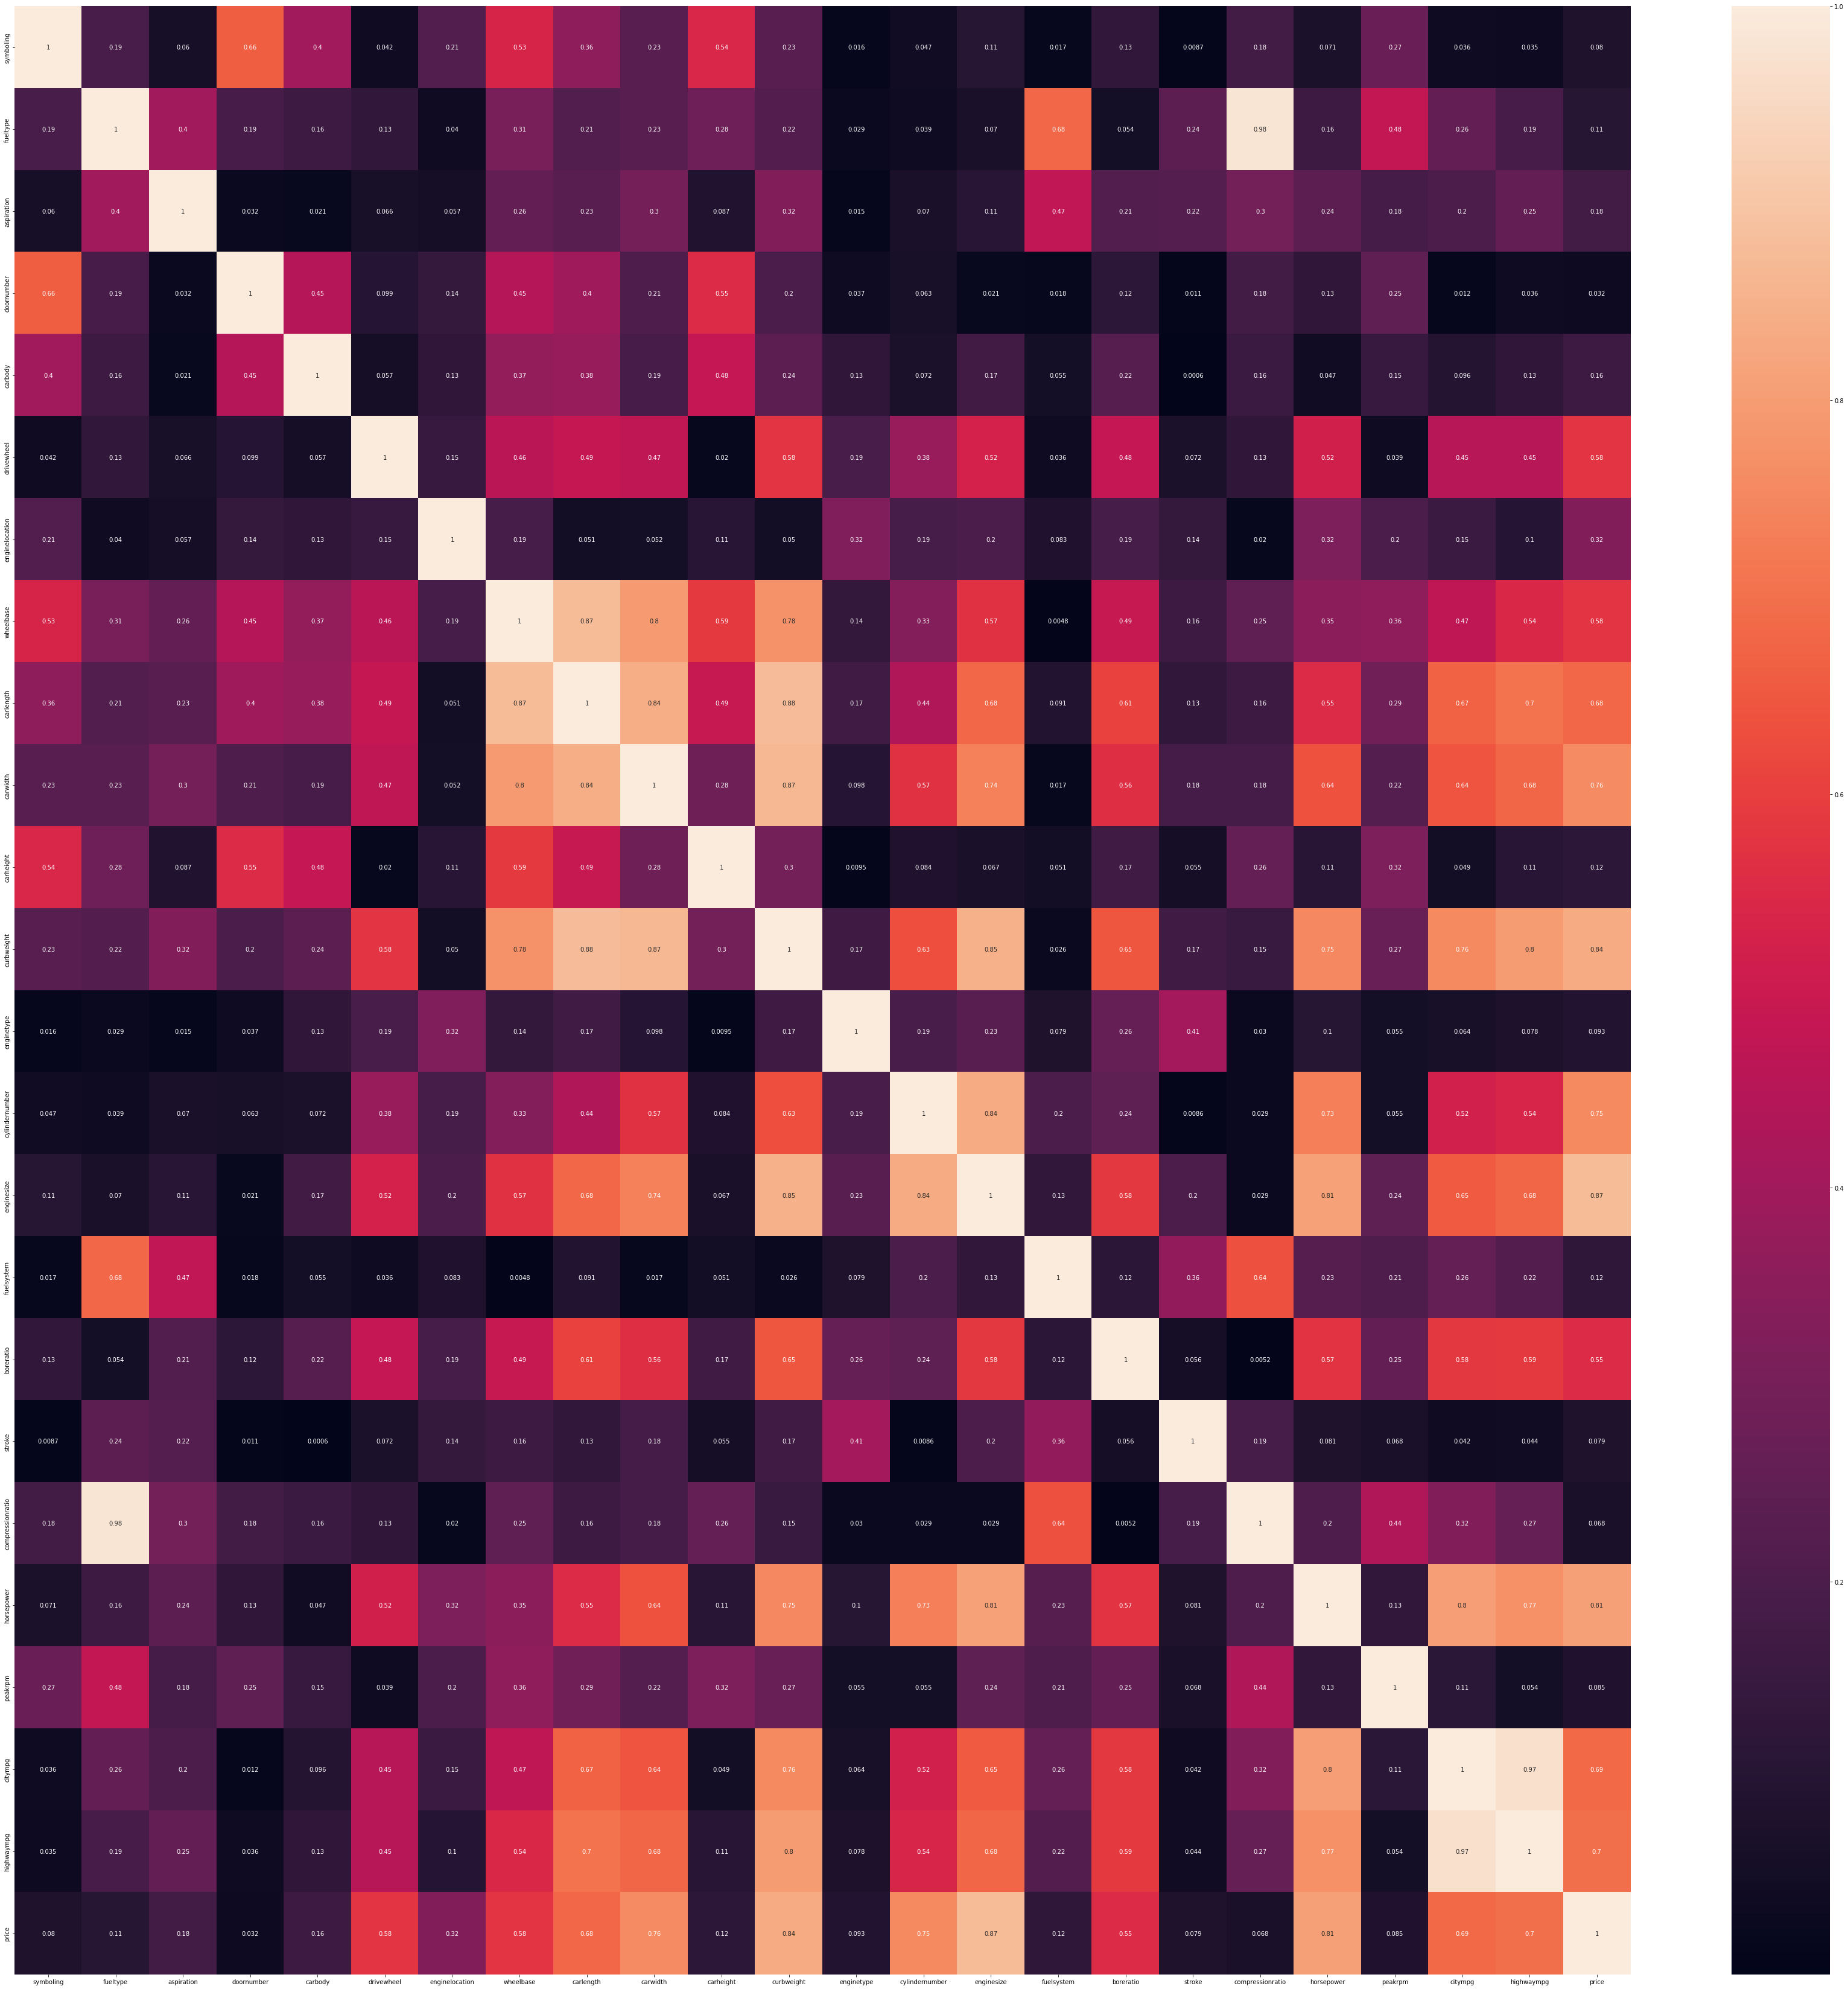

In [17]:
plt.figure(figsize = (60,60))
sns.heatmap(df_psc.corr().abs(), annot = True)

In [18]:
# sns.heatmap(df_price.corr() , annot=True)
corr = df_psc.corr(method='pearson')
corr_price = corr['price'].abs().sort_values(ascending=False)
corr_price

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
cylindernumber      0.754557
highwaympg          0.697599
citympg             0.685751
carlength           0.682920
drivewheel          0.577992
wheelbase           0.577816
boreratio           0.553173
enginelocation      0.324973
aspiration          0.177926
carbody             0.161294
fuelsystem          0.122118
carheight           0.119336
fueltype            0.105679
enginetype          0.092841
peakrpm             0.085267
symboling           0.079978
stroke              0.079443
compressionratio    0.067984
doornumber          0.031835
Name: price, dtype: float64

In [19]:
## X, y split ##
# price
# horsepower ( out: citympg, highwaympg, enginesize, cylindernumber, curbweight,
#                   carwidth, carlength )
# fueltype ( out: compressionraio )
pX = df_psc.drop(columns=['price','enginesize','curbweight','cylindernumber',
                          'carwidth','carlength', 'wheelbase', 'compressionratio', 
                          'citympg', 'highwaympg'],axis=1)
py = df_psc['price']

# 2. Train_set, test_set 나누기
이제 학습에 사용할 데이터와 모델 검증에 사용할 테스트 데이터를 나눌 예정이에요.

**[조건]**
- test_size는 0.2로, random_state는 42로 지정해주세요
- 테스트 데이터는 절대 학습 과정에 관여하면 안돼요!
- 조건에 어긋난 경우, 채점을 하지 않을 예정이니 주의해주세요...!

In [20]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pX ,py, test_size = 0.2, random_state = 42)

# 3. 학습!

원하는 모델을 선언하세요. 참고로 regression 모델은 정말 많답니다. 이 문서를 참조해 보시겠어요?

https://scikit-learn.org/stable/supervised_learning.html

이곳에서 데이터에 적절하다고 생각되는 **regression model** 을 골라서 선언하세요. 그리고 2에서 나눈 데이터를 이용해 학습하는 거예요!

모델을 선언하는 예시는 제가 LinearRegression으로 만들어 보았어요. 참고해서 사용하세요!

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
model = RandomForestRegressor(random_state=0)

## 모델을 학습하는 코드 작성 ##
model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

# 4. 모델 평가

이제 모델을 평가해볼 시간이에요! 저는 여러분의 모델을 아래에 있는 **r2_score**와 **root_mean_squared_error**을 이용해서 채점할 예정이에요.

모델의 점수는 여러가지 원인으로 갈려요. 적절한 모델을 선택했는지, 그리고 그 모델에서 HyperParameter을 어떻게 설정했는지, 심지어 Data의 전처리 때문에 점수가 갈리는 경우도 있어요.

모델을 평가하는 코드를 완성하여 여러분의 모델을 채점해보세요.

In [23]:
# 해당 점수로 채점할거예요.
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [24]:
## 모델을 TEST 하는 코드 작성 ##

y_predict = model.predict(X_test)

## 채점은 여기서!
your_score = r2_score(y_test,y_predict)
print(f'R2_score is {your_score:.4f}, RMSE is {np.sqrt(mean_squared_error(y_test, y_predict)):.4f}')

R2_score is 0.9476, RMSE is 2034.7490


# 5. 최종 채점

여러분의 과제는 모델의 RMSE 수치에 따라 채점될 예정이에요

채점 기준은 다음과 같으니 참고하시길 바래요.

**[채점 기준]**

- 이번 과제는 런타임 초기화 후, 처음으로 출력된 점수에 대해서만 평가해요.
- RMSE 수치가 2200 미만: **50점 (만점)**
- RMSE 수치가 2200 이상, 3000 미만: **45점**
- RMSE 수치가 3000 이상, 3500 미만: **35점**
- RMSE 수치가 3500 이상, 5000 미만: **25점**
- RMSE 수치가 5000 이상, 혹은 **R2_score가 0 미만**: **0점**

## **More...?**

만약 regression에 대해 조금 더 공부를 하시고 싶으시다면 아래의 자료로도 regression 모델을 만들어보세요.

해당 자료로 만들어진 모델은 채점에 들어가지 않으니 부담갖지 않으셔도 돼요!

In [25]:
df_insurance = pd.read_csv('https://raw.githubusercontent.com/TA-YSH/DAP/main/lab8/insurance.csv')